## Summary

**Paper draft**:

https://www.overleaf.com/1225397724nhhpgfjszczg#a93b66

**Our Result**:

| level2   | GPT-3.5-turbo | GPT-4     | GPT-4-turbo | GPT-3.5-turbo | GPT-4     | GPT-4-turbo |
|----------|---------------|-----------|-------------|---------------|-----------|-------------|
| Settings | Zero-shot     | Zero-shot | Zero-shot   | few-shots     | few-shots | few-shots   |
| Accuracy | 41.5          | 45.2      | 45.7        | 37.9          | 43.3      | 47.7        |
| Note     |               |           |             | idk:102       |           |             |

**ClimateX**:

| ClimateX | GPT-3.5-turbo | GPT-4     | GPT-3.5-turbo | GPT-4     |
|----------|---------------|-----------|---------------|-----------|
| Settings | Zero-shot     | Zero-shot | few-shots     | few-shots |
| Accuracy | 43.4          | 44.3      | 41.7          | 47.0      |

**CMIP**:

https://github.com/xCDAT/xcdat

Example dataset: 'tas_Amon_ACCESS-ESM1-5_historical_r10i1p1f1_gn_185001-201412.nc'

- Scenario 1 - Calculate the spatial averages over the tropical region
- Scenario 2 - Calculate the annual anomalies
- Scenario 3 - Horizontal regridding (bilinear, gaussian grid)

## Previous result:

(5.6) 
Code:

https://github.com/yl1127/Academic-projects/blob/main/yl_Climate_LLM/ChatIAMs/yl_ChatIAMs_0506.ipynb


Result:

- IAMs prediction result: https://github.com/yl1127/Academic-projects/blob/main/yl_Climate_LLM/ChatIAMs/magicc7_res_World_CI_2024_2100.csv
- Level 1 result: https://github.com/yl1127/Academic-projects/blob/main/yl_Climate_LLM/ChatIAMs/Prediction_level1_result.csv
- Level 2 (ChatGPT-3.5-turbo): https://github.com/yl1127/Academic-projects/blob/main/yl_Climate_LLM/ChatIAMs/gpt3.5-turbo-zeroshot-temp0-tables-2024-05-06.csv
- Level 2 (ChatGPT-4): https://github.com/yl1127/Academic-projects/blob/main/yl_Climate_LLM/ChatIAMs/gpt-4-zeroshot-temp0-tables-2024-05-06.csv

(4.23, 4.30) Climate AI challenge

(4.16) Framework:

Question/Statement -> Function_call(LLM1) -> input -> IAMs climate models -> output -> LLM2 -> Answer/Confidence

Paper Draft:

https://www.overleaf.com/1749998929jmfphhjmzbhp#1025c6

Methods

- Level 1: Synthetic QA
- Level 2: IPCC related QA or claim fact-checking https://huggingface.co/datasets/rlacombe/ClimateX
- Level 3: General climate QA or claim fact-checking https://huggingface.co/datasets/pierre-pessarossi/climate-question-answers/tree/main/data

**Level 2**: ClimateX

https://arxiv.org/abs/2311.17107

ClimateX Framework:

Question/Statement -> ChatGPT(with Prompt) -> Answer/Confidence

Ex: "Since 2011 (measurements reported in AR5), concentrations have continued to increase in the atmosphere, reaching annual averages of 410 parts per million (ppm) for carbon dioxide (CO 2), 1866 parts per billion (ppb) for methane (CH 4), and 332 ppb for nitrous oxide (N 2O) in 2019.6 Land and ocean have taken up a near-constant proportion (globally about 56% per year) of CO 2 emissions from human activities over the past six decades, with regional differences"

input: Prompt Templates

output: only a word

**Level 1 (Table)**

- Question: "What are the World|Northern Hemisphere|Land Surface Air Temperature Change under ssp534-over in 2040 and 2044?"

- function_call: [Surface Air Temperature Change, [2040, 2044]]

- IAM (climate model): `Table`

- LLM2

- Answer: The World land surface air temperature change under SSP534-over in 2040 is approximately 1.87 K and in 2044 is approximately 1.99 K.

**Future work**:

1. IAMs climate model
2. ClimateX accuracy result
3. paper draft

(4.9)Example(Level1):

- Question: What is the World Atmospheric Concentrations|CO2 under ssp126 in 1778?

- function_call: [Atmospheric Concentrations|CO2, 1778, ssp126, World]

- IAM (climate model):[278.866, 'ppm']
- LLM2
- Answer: The World Atmospheric Concentrations|CO2 under ssp126 in 1778 was 278.866 ppm.

Challenges:

1. IAMs Climate model. 
   - How to understand the input?
   - Is there any other output variables?
2. ChatGPT
   - There's input token limit.
   - Cost


(4.2)Paper idea:

Our LLM framework to do the Q&A task:

Question -> Function_call(LLM1) -> input -> **prediction model** -> output -> LLM2 -> Answer

IPCC report

Annex III: Scenarios and Modelling Methods

https://www.ipcc.ch/report/ar6/wg3/downloads/report/IPCC_AR6_WGIII_Annex-III.pdf

Useful resources:

1. pyam: analysis and visualization of integrated-assessment & macro-energy scenarios https://pyam-iamc.readthedocs.io/en/stable/index.html

2. AR6 Scenario Explorer and Database https://data.ece.iiasa.ac.at/ar6/

3. openscm-runner https://openscm-runner.readthedocs.io/en/latest/

The recently developed OpenSCM-Runner package (Nicholls
et al. 2020a) provides users with the ability to run multiple emulators
from a  single interface. OpenSCM-Runner has been built in
collaboration with the WGIII research community and forms part of
the WGIII assessment (Annex III.II.2.5.1).


(3.26)Paper idea:

Our LLM model to do the Q&A task:

Question -> Function_call(LLM1) -> input -> prediction model -> output -> LLM2 -> Answer

Ex: 

Question: "Will coastal New York see the impact of Greenland ice sheet melting by 2100?"

Function_call(LLM1): 'gpt-3.5-turbo'

input: 2100

prediction model: "GMSL_prediction_SEM.csv"

output: 'The prediction of global mean sea level in 2100 is 686.690760499435. The 95% of confidence interval is from 604.018417351968 to 769.363103646902.'

LLM2: 'gpt-3.5-turbo'

Answer: 'Based on the provided sea level prediction for 2100 and the 95% confidence interval, coastal New York is likely to see the impact of Greenland ice sheet melting by 2100. The predicted global mean sea level rise of 686.690760499435 by 2100 falls within the 95% confidence interval of 604.018417351968 to 769.363103646902. This indicates a high probability of sea level rise that could result from the melting of the Greenland ice sheet, which would impact coastal areas like New York.'

(3.19)Papers:

ClimateX: Do LLMs Accurately Assess Human Expert Confidence in Climate Statements? (28 Nov 2023) https://arxiv.org/abs/2311.17107

Large Language Models: A Survey (20 Feb 2024) https://arxiv.org/abs/2402.06196

An Interactive Agent Foundation Model (8 Feb 2024) https://arxiv.org/abs/2402.05929

HuggingGPT: Solving AI Tasks with ChatGPT and its Friends in Hugging Face (3 Dec 2023) https://arxiv.org/abs/2303.17580

Video as the New Language for Real-World Decision Making (27 Feb 2024) https://arxiv.org/abs/2402.17139


(3.12)Paper idea:(Needs to discuss)

1. Task(Experiment):
- Climate related
-  Ex. Questions&Answers, fact-checking or anything else

1. Methods: 
- Retrieval (RAG) ChatGPT, Llama2, Gemma, Claude
- Function call ChatGPT, Claude

1. Agreement
- Create a new Large language based model and apply it to climate area.
- solve hallucination and outdated information

My idea:

1. Task(Experiment): Sea level related Questions&Answers
2. Methods: LLM + Sea level prediction function (+ other prediction functions)

(3.5)Tool related papers:

Gorilla: Large Language Model Connected with Massive APIs (24 May 2023) https://arxiv.org/abs/2305.15334

ART: Automatic multi-step reasoning and tool-use for large language models (16 Mar 2023) https://arxiv.org/abs/2303.09014

https://github.com/google/BIG-bench/blob/main/bigbench/benchmark_tasks/keywords_to_tasks.md#summary-table

ToolLLM: Facilitating Large Language Models to Master 16000+ Real-world APIs (3 Oct 2023) https://arxiv.org/abs/2307.16789

ToolkenGPT: Augmenting Frozen Language Models with Massive Tools via Tool Embeddings (15 Jan 2024) https://arxiv.org/abs/2305.11554

Feature Table:

| Feature              | ChatGPT-4 | ChatClimate | Climinator | Our |
|----------------------|-----------|-------------|------------|-----|
| Climate Specific     |           |       ✅      |     ✅       |  ✅   |
| External information |           |        ✅     |    ✅        |   ✅  |
| Tool use             |           |             |            | ✅    |
| Single step          |     ✅      |    ✅         |            |     |
| Multi step           |           |             |         ✅   |  ✅   |


(2.27)Fact-checking paper

Paper idea:

Answer the question: What is the weather in New York right now?

https://platform.openai.com/docs/guides/function-calling (2023.6.23)

(2.20)Paper Presentation: Automated Fact-Checking of Climate Change Claims with Large Language Models (23 Jan 2024) https://arxiv.org/abs/2401.12566

Slides https://github.com/yl1127/Academic-projects/blob/main/yl_Climate_LLM/yl_CLIMINATOR_final_0220.pdf

Visualization Discussion:
1. other split method(By default: Split by character ) https://python.langchain.com/docs/modules/data_connection/document_transformers/#evaluate-text-splitters
3. Create collection(By default: chroma) https://python.langchain.com/docs/modules/data_connection/vectorstores/
       https://python.langchain.com/docs/integrations/vectorstores
4. Visualization space https://umap-learn.readthedocs.io/en/latest/index.html

Paper idea : solve issues (hallucination, outdated information and prediction)
1. reply some exist data (RAG same as the chatclimate)
2. do the prediction (Agent let the LLM be able to use tool like our prediction model Autoregressive Distributed Lag (ARDL))
3. Answer the question like "Will coastal New York see the impact of Greenland ice sheet melting by 2100?"

(2.12)New mehtod: RAG details and visualize.

(2.6)Papers: 

ClimateBert: A Pretrained Language Model for Climate-Related Text (22 Oct 2021) https://arxiv.org/abs/2110.12010

Retrieval-Augmented Generation for Knowledge-Intensive NLP Tasks (22 May 2020) https://arxiv.org/abs/2005.11401

Query Expansion by Prompting Large Language Models (5 May 2023) https://arxiv.org/abs/2305.03653

PLLaMa: An Open-source Large Language Model for Plant Science (3 Jan 2024) https://arxiv.org/abs/2401.01600

GenCast: Diffusion-based ensemble forecasting for medium-range weather (25 Dec 2023) https://arxiv.org/abs/2312.15796


Google docs:

Q1.5: "Have emissions reductions fallen for some countries?"

Q2.2: "Is it possible the Arctic will become ice free at some points before 2050?"

https://docs.google.com/document/d/1HGypipUiT0u045w-9PcUgCWJAXOX4fqpFQNKhjiG6ys/edit?usp=sharing

All question: https://docs.google.com/document/d/1AEu75SflCQhwFmI4dBdG58RIPq7hzhkN6ip9h19dv0o/edit?usp=sharing



(1.31)New model: [Bard(Original)](https://bard.google.com/chat) For 13 questions from paper, [13 answers](https://g.co/bard/share/117570e457af) For 7 new questions, [7 answers](https://g.co/bard/share/644ebd6a4f50) API [Join Waitlist](https://cloud.google.com/ai/earlyaccess/join?hl=en)

(1.22) View the all [answers](yl_Appendix.ipynb).

(1.16) 7 questions:

1. What is the best estimate of the equilibrium climate sensitivity?
2. Is it possible the Arctic will become ice free at some points before 2050?
3. How likely will the world see runaway ice loss from the Antarctic  ice sheets by 2100?
4. To what extent has climate change impacted ice sheets in both polar regions?
5. Will coastal New York see the impact of Greenland ice sheet melting by 2100?
6. What will be the likely changes to weather and climate extremes in coastal New York around 2050 if the world take no action to reduce greenhouse gas emissions?
7. What are the primary evidence and how robust is it that human activities caused the observed global warming since the pre-industrial period?

The 13 original questions are from [chatClimate: Grounding Conversational AI in Climate Science](https://arxiv.org/abs/2304.05510)



The Climate report is from [IPCC_AR6_WGIII_FullReport](https://sdgs.un.org/sites/default/files/2023-01/IPCC_AR6_WGIII_FullReport.pdf)

(1.2)The Llama2(Original), ChatGPT-4(Original), Llama2+(Climate report) and Llama2 hybird code parts are available [here](https://github.com/yl1127/Academic-projects/blob/main/yl_Climate_LLM/yl_Climate_0102.ipynb).


(2023.12.18)The Llama2(Original) and Llama2+(Climate report) code parts are available [here](https://github.com/yl1127/Academic-projects/blob/main/yl_Climate_LLM/yl_LlamaCloud_Climate.ipynb).


## ChatGPT

- Setup the openai helper function

In [1]:
# OpenAI API
from getpass import getpass
import os
import openai
from openai import OpenAI

# from dotenv import load_dotenv, find_dotenv
# _ = load_dotenv(find_dotenv()) # read local .env file
new_api_key = getpass()

os.environ["OPENAI_API_KEY"] = new_api_key
openai.api_key = os.environ['OPENAI_API_KEY']

openai_client = OpenAI()

In [2]:
# Level 2 by DSPy

from dsp import GPT3
from dsp import settings

lm = GPT3(model = "gpt-3.5-turbo", api_key=new_api_key, model_type="chat")

# lm = GPT3(model = "gpt-4", api_key=new_api_key, model_type="chat")

settings.configure(lm=lm)
settings.show_guidelines = True

/Users/ylpan/anaconda3/envs/ChatIAMs0418/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Level2 (zero-shot GPT-4-Turbo)

In [49]:
import pandas as pd
import dspy
import re

from dsp import Type
from dsp import Template

from dsp import Example
from dsp import sample

from dsp import transformation
from dsp import generate

from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [50]:
# Level 2 by DSPy

from dsp import GPT3
from dsp import settings

lm = GPT3(model = "gpt-4-turbo", api_key=new_api_key, model_type="chat")

settings.configure(lm=lm)
settings.show_guidelines = True

In [51]:
df = pd.read_csv('ipcc_statements_dataset.tsv', sep='\t', skiprows=0)

train_set = df.loc[df['split'] == 'train']
test_set = df.loc[df['split'] == 'test']

In [52]:
ipcc_train = [dspy.Example(input=row['statement'], label=row['confidence'], score=row['score'], report=row['report'])
                    for _, row in train_set.iterrows()]

In [53]:
Input = Type(
    prefix="Statement:", 
    desc="${a short statement about climate.}")

Label = Type(
    prefix="Confidence: ", 
    desc="${must be *only*: 'low', 'medium', 'high', 'very high'}")

Table = Type(
    prefix="IAMs output: ", 
    desc="${a json table about dataset related with statment above.}")

zero_shot_template = Template(
    instructions="You are a knowledgeable climate science assistant trained to assess the confidence level associated with various statements about climate change. \
      \n\nYou will be presented with a statement about climate science, climate impacts or climate change mitigation which is retrieved or paraphrased from the IPCC AR6 WGI, WGII or WGIII assessment reports. Climate scientists have evaluated that statement as low confidence, medium confidence, high confidence, or very high confidence, based on evidence (type, amount, quantity, consistency) and agreement among their peers. What is their confidence level?  \
      \n\nRespond *only* with one of the following words: 'low', 'medium', 'high', 'very high'. If you don't know, you can respond 'I don't know'.",
    input=Input(),
    table = Table(),
    label=Label())

In [54]:
ex = Example(
    input=ipcc_train[0]['input'], table = function_response, label=ipcc_train[0]['label'])

ex.demos=sample(ipcc_train, 0)

In [55]:
@transformation
def assess_certainty(example, temperature=0): 
    
    example, completion = generate(zero_shot_template,  temperature=temperature)(example, stage='zero-shot')

    return completion

def extract_confidence(text):
    if re.search(r"low", text, re.IGNORECASE):
        return "low"
    elif re.search(r"medium", text, re.IGNORECASE):
        return "medium"
    elif re.search(r"very high", text, re.IGNORECASE):
        return "very high"
    elif re.search(r"high", text, re.IGNORECASE):
        return "high"
    elif re.search(r"i don't know", text, re.IGNORECASE):
        return "idk"
    else:
        return "N/A"

In [56]:
samples = test_set.copy()  # Dev: train_set.sample(n=100, random_state=12).copy() | Experiment: test_set.copy()

# samples.head
idx = samples.statement_idx

In [57]:
new_col = []
for i in samples.statement_idx:
    print(i)
    idx = idx.drop(i)
    QorS = samples.statement[i]

    messages = [{
        "role": "system", "content": '''You are a knowledgeable climate science assistant trained to classify the variables and year associated with various questions or statements about climate change.''',
        "role": "user", "content": QorS
        }]

    response = openai_client.chat.completions.create(
            model="gpt-3.5-turbo-0125",
            messages=messages,
            tools=tools,
            tool_choice="auto",  # auto is default, but we'll be explicit
            )
    response_message = response.choices[0].message

    tool_calls = response_message.tool_calls

    if tool_calls:
        try:
            messages = [{"role": "user", "content": QorS}]
            # Step 3: call the function
            # Note: the JSON response may not always be valid; be sure to handle errors
            available_functions = {
                "get_climate_change": get_climate_change,
            }  # only one function in this example, but you can have multiple
            messages.append(response_message)  # extend conversation with assistant's reply
            for tool_call in tool_calls:
                function_name = tool_call.function.name
                function_to_call = available_functions[function_name]
                function_args = json.loads(tool_call.function.arguments)
                function_response = function_to_call(
                variable=function_args.get("variable"),
                year=function_args.get("year"),
                scenario = function_args.get("scenario")
            )
                print([function_args.get("variable"), function_args.get("year"), function_args.get("scenario")])
            new_col.append(function_response)
        except Exception:
            new_col.append(None)
    else: new_col.append(None)
samples['tables'] = new_col

3
42
['Sea Level Change', '2100', 'ssp119']
['Sea Level Change', '2100', 'ssp126']
['Sea Level Change', '2100', 'ssp245']
['Sea Level Change', '2100', 'ssp370']
['Sea Level Change', '2100', 'ssp460']
['Sea Level Change', '2100', 'ssp585']
77
['Sea Level Change', '2100', 'ssp119']
81
86
98
151
157
['Surface Air Temperature Change', '2050', 'ssp245']
['Surface Air Temperature Change', '2050', 'ssp245']
162
['Surface Air Temperature Change', '2024', 'ssp585']
165
['Surface Air Temperature Change', '2050', 'ssp119']
190
['Sea Level Change', '2000', 'ssp585']
197
['Sea Level Change', '1971', 'ssp585']
233
['Surface Air Temperature Change', '2021', 'ssp126']
237
['Surface Air Temperature Change', '1980', 'ssp119']
282
['Surface Air Temperature Change', '2020', 'ssp585']
322
361
['Surface Air Temperature Change', '2024', 'ssp585']
371
['Surface Air Temperature Change', '2020', 'ssp585']
415
['Surface Air Temperature Change', '2050', 'ssp585']
['Sea Level Change', '2050', 'ssp585']
419
['Atmos

In [58]:
pred = []
for i in samples.statement_idx:
    print(i)
    ex = Example(input=samples.statement[i], table = samples.tables[i])
    ex.demos=sample(ipcc_train, 0)
    pred.append(extract_confidence(assess_certainty(ex).label.lower()))
samples['prediction'] = pred

3
42
77
81
86
98
151
157
162
165
190
197
233
237
282
322
361
371
415
419
467
497
548
556
572
583
586
593
602
621
663
671
679
687
688
736
741
768
772
774
783
795
855
922
941
974
980
997
1005
1027
1036
1042
1096
1185
1259
1263
1275
1304
1332
1342
1362
1390
1450
1466
1470
1489
1507
1510
1567
1591
1630
1664
1666
1760
1804
1831
1838
1885
1906
1928
1935
1956
1957
2001
2016
2046
2089
2095
2115
2132
2191
2196
2208
2235
2293
2310
2392
2423
2430
2473
2518
2520
2525
2572
2589
2599
2605
2616
2672
2685
2804
2914
2930
2964
3015
3071
3127
3156
3184
3186
3222
3242
3246
3250
3282
3290
3305
3333
3381
3418
3419
3426
3428
3455
3456
3487
3553
3574
3581
3609
3659
3693
3747
3757
3759
3788
3800
3832
3851
3865
3872
3887
3908
3942
3950
3976
4048
4052
4080
4145
4190
4239
4253
4254
4264
4345
4420
4439
4446
4456
4541
4580
4611
4636
4696
4764
4824
4882
4948
4956
4965
4970
5038
5048
5092
5093
5099
5120
5137
5166
5171
5202
5243
5246
5285
5324
5335
5349
5351
5354
5390
5436
5444
5498
5620
5670
5704
5737
5798
5825
5922


In [59]:
samples['correct'] = samples.apply(
    lambda row: (row['confidence'] == row['prediction']), axis=1)

print(f"Accuracy: {samples['correct'].sum() / (samples.shape[0]-len(samples[samples['prediction'] == 'idk'])):.3f}")
print(f"'I don't know': {len(samples[samples['prediction'] == 'idk'])}")
print(f"N/A: {len(samples[samples['prediction'] == 'N/A'])}")

Accuracy: 0.457
'I don't know': 0
N/A: 0


In [60]:
samples.to_csv('gpt4-turbo-zeroshot-temp0-tables-2024-05-15.csv', index=False)

## Level 2 (few-shot GPT-3.5)

In [3]:
import pandas as pd
import dspy
import re

from dsp import Type
from dsp import Template

from dsp import Example
from dsp import sample

from dsp import transformation
from dsp import generate

from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import json

import openai
import dsp
import transformers

### Dataset

- load the dataset https://huggingface.co/datasets/rlacombe/ClimateX
- check on dataset

In [4]:
df = pd.read_csv('ipcc_statements_dataset.tsv', sep='\t', skiprows=0)

train_set = df.loc[df['split'] == 'train']
test_set = df.loc[df['split'] == 'test']

In [5]:
ipcc_train = [dsp.Example(input=row['statement'], label=row['confidence'], score=row['score'], report=row['report'])
                    for _, row in train_set.iterrows()]

# ipcc_train[:10]
# print(len(ipcc_train))
# print(len([ex for ex in ipcc_train if ex.label=='low']))
# print(len([ex for ex in ipcc_train if ex.report=='AR6_WGIII']))
# print(len([ex for ex in ipcc_train if ex.score==2]))

In [6]:
train_ex = {}
for confidence in ['low', 'medium', 'high', 'very high']: 
  train_ex[confidence] = [ex for ex in ipcc_train if ex.label==confidence]
  print(f"{confidence}: {len(train_ex[confidence])}")

low: 241
medium: 2415
high: 4611
very high: 527


### function_call

In [7]:
tools = [
        {
            "type": "function",
            "function": {
                "name": "get_climate_change",
                "description": "Get the climate change data in a given variables, year, scenario and region ",
                "parameters": {
                    "type": "object",
                    "properties": {
                        "variable": {
                            "type": "string",
                            "description": "a range of climate-related metrics",
                            "enum": ["Surface Air Temperature Change",
                            "Atmospheric Concentrations|CO2",
                            "Effective Radiative Forcing",
                            "Effective Radiative Forcing|CO2",
                            "Effective Radiative Forcing|Aerosols",
                            "Effective Radiative Forcing|Aerosols|Direct Effect|BC",
                            "Effective Radiative Forcing|Aerosols|Direct Effect|OC",
                            "Effective Radiative Forcing|Aerosols|Direct Effect|SOx",
                            "Effective Radiative Forcing|Aerosols|Direct Effect",
                            "Effective Radiative Forcing|Aerosols|Indirect Effect",
                            "Sea Level Change"]
                        },
                        "year": {"type": "string", "description": "years starting from 2024 to 2100"},
                        "scenario": {
                            "type": "string",
                            "description": "a list of climate scenario settings",
                            "enum": ['ssp119', 'ssp126', 'ssp245', 'ssp370', 'ssp460', 'ssp585']
                        },
                    },
                    "required": ["variable", "year", "scenario"],
                },
            },
        }
    ]

In [8]:
# Example climate function to return the data

def get_climate_change(variable, year, scenario):
    """Get the climate related variables data in given year and scenario."""
    df = pd.read_csv('/Users/ylpan/IPCC_Report_Models/magicc7_res_World_CI_2024_2100.csv')
    col = ['model','quantile', 'variable','unit', 'scenario', year]
    
    # value = magicc_res.filter(
    # variable=variables,
    # year=year,
    # scenario='ssp126',
    # region='World').values[0][0]
    return df[col][(df['variable'] == variable) & (df['scenario'] == scenario)].to_json()

print(get_climate_change('Sea Level Change', '2033', 'ssp245'))

{"model":{"512":"uSEM"},"quantile":{"512":0.5},"variable":{"512":"Sea Level Change"},"unit":{"512":"mm"},"scenario":{"512":"ssp245"},"2033":{"512":143.4522481}}


### Prompt Templates

- few-shot prompt
- prompt example

In [9]:
## few-shot

Input = dsp.Type(
    prefix="Statement:", 
    desc="${a short statement about climate.}")

Table = Type(
    prefix="IAMs output: ", 
    desc="${a json table from IAM climate modeling.}")

Label = dsp.Type(
    prefix="Confidence: ", 
    desc="${must be *only*: 'low', 'medium', 'high', 'very high'}")

few_shot_template = dsp.Template(
    instructions="You are a knowledgeable climate science assistant trained to assess the confidence level associated with various statements about climate change. \
      \n\nYou will be presented with a statement about climate science, climate impacts or climate change mitigation which is retrieved or paraphrased from the IPCC AR6 WGI, WGII or WGIII assessment reports. Climate scientists have evaluated that statement as low confidence, medium confidence, high confidence, or very high confidence, based on evidence (type, amount, quantity, consistency) and agreement among their peers. What is their confidence level?  \
      \n\nRespond *only* with one of the following words: 'low', 'medium', 'high', 'very high'. If you don't know, you can respond 'I don't know'.",
    input=Input(),
    table = Table(),
    label=Label())

In [10]:
# ## Zero-shot

# Input = Type(
#     prefix="Statement:", 
#     desc="${a short statement about climate.}")

# Label = Type(
#     prefix="Confidence: ", 
#     desc="${must be *only*: 'low', 'medium', 'high', 'very high'}")

# Table = Type(
#     prefix="IAMs output: ", 
#     desc="${a json table from IAM climate modeling. This table is high confidence but the values maybe not related with statement.}")

# zero_shot_template = Template(
#     instructions="You are a knowledgeable climate science assistant trained to assess the confidence level associated with various statements about climate change. \
#       \n\nYou will be presented with a statement about climate science, climate impacts or climate change mitigation which is retrieved or paraphrased from the IPCC AR6 WGI, WGII or WGIII assessment reports. Climate scientists have evaluated that statement as low confidence, medium confidence, high confidence, or very high confidence, based on evidence (type, amount, quantity, consistency) and agreement among their peers. What is their confidence level?  \
#       \n\nRespond *only* with one of the following words: 'low', 'medium', 'high', 'very high'. If you don't know, you can respond 'I don't know'. By default, respond from 'high' and 'medium'. If you have strong evidence, respond from 'low' and 'very high'.",
#     input=Input(),
#     table = Table(),
#     label=Label())

In [11]:
ex = dsp.Example(
    input=ipcc_train[0]['input'], label=ipcc_train[0]['label'])

ex.demos=dsp.sample(ipcc_train, 3)

print(few_shot_template(ex))

You are a knowledgeable climate science assistant trained to assess the confidence level associated with various statements about climate change.       

You will be presented with a statement about climate science, climate impacts or climate change mitigation which is retrieved or paraphrased from the IPCC AR6 WGI, WGII or WGIII assessment reports. Climate scientists have evaluated that statement as low confidence, medium confidence, high confidence, or very high confidence, based on evidence (type, amount, quantity, consistency) and agreement among their peers. What is their confidence level?        

Respond *only* with one of the following words: 'low', 'medium', 'high', 'very high'. If you don't know, you can respond 'I don't know'.

---

Follow the following format.

Statement: ${a short statement about climate.}
IAMs output: ${a json table from IAM climate modeling.}
Confidence: ${must be *only*: 'low', 'medium', 'high', 'very high'}

---

Statement: Experiments indicate that wa

### Task
- Testing by chatgpt-3.5

In [12]:
import random

@dsp.transformation
def assess_certainty_with_demonstrations(example, temperature=0): 
    
    # Sample demonstrations in train set for each confidence level
    example.demos = []
    for confidence in ['low', 'medium', 'high', 'very high']:
        demo = random.choice(train_ex[confidence])
        example.demos.append(demo)

    # Call LLM
    example, completion = dsp.generate(few_shot_template,  temperature=temperature)(example, stage='few-shot')

    return completion

def extract_confidence(text):
    if re.search(r"low", text, re.IGNORECASE):
        return "low"
    elif re.search(r"medium", text, re.IGNORECASE):
        return "medium"
    elif re.search(r"very high", text, re.IGNORECASE):
        return "very high"
    elif re.search(r"high", text, re.IGNORECASE):
        return "high"
    elif re.search(r"i don't know", text, re.IGNORECASE):
        return "idk"
    else:
        return "N/A"

### Experiment

- Get the accuracy

In [13]:
samples = test_set.copy()  # Dev: train_set.sample(n=100, random_state=12).copy() | Experiment: test_set.copy()

idx = samples.statement_idx
# samples.head
print(idx)

3          3
42        42
77        77
81        81
86        86
        ... 
8024    8024
8056    8056
8067    8067
8086    8086
8093    8093
Name: statement_idx, Length: 300, dtype: int64


In [14]:
# idx = samples.statement_idx
# new_col = []
# for i in samples.statement_idx:
#     print(i)
#     idx = idx.drop(i)
#     QorS = samples.statement[i]

#     messages = [{
#         "role": "system", "content": '''You are a knowledgeable climate science assistant trained to classify the variables and year associated with various questions or statements about climate change.''',
#         "role": "user", "content": QorS
#         }]

#     response = openai_client.chat.completions.create(
#             model="gpt-3.5-turbo-0125",
#             messages=messages,
#             tools=tools,
#             tool_choice="auto",  # auto is default, but we'll be explicit
#             )
#     response_message = response.choices[0].message

#     tool_calls = response_message.tool_calls

#     if tool_calls:
#         messages = [{"role": "user", "content": QorS}]
#         # Step 3: call the function
#         # Note: the JSON response may not always be valid; be sure to handle errors
#         available_functions = {
#             "get_climate_change": get_climate_change,
#         }  # only one function in this example, but you can have multiple
#         messages.append(response_message)  # extend conversation with assistant's reply
#         for tool_call in tool_calls:
#             function_name = tool_call.function.name
#             function_to_call = available_functions[function_name]
#             function_args = json.loads(tool_call.function.arguments)
#             function_response = function_to_call(
#             variable=function_args.get("variable"),
#             year=function_args.get("year"),
#             scenario = function_args.get("scenario")
#         )
#             print([function_args.get("variable"), function_args.get("year"), function_args.get("scenario")])
#         new_col.append(function_response)
#     else: new_col.append(None)

# samples['tables'] = new_col

In [15]:
idx = samples.statement_idx
new_col = []
for i in samples.statement_idx:
    print(i)
    idx = idx.drop(i)
    QorS = samples.statement[i]

    messages = [{
        "role": "system", "content": '''You are a knowledgeable climate science assistant trained to classify the variables and year associated with various questions or statements about climate change.''',
        "role": "user", "content": QorS
        }]

    response = openai_client.chat.completions.create(
            model="gpt-3.5-turbo-0125",
            messages=messages,
            tools=tools,
            tool_choice="auto",  # auto is default, but we'll be explicit
            )
    response_message = response.choices[0].message

    tool_calls = response_message.tool_calls

    if tool_calls:
        try:
            messages = [{"role": "user", "content": QorS}]
            # Step 3: call the function
            # Note: the JSON response may not always be valid; be sure to handle errors
            available_functions = {
                "get_climate_change": get_climate_change,
            }  # only one function in this example, but you can have multiple
            messages.append(response_message)  # extend conversation with assistant's reply
            for tool_call in tool_calls:
                function_name = tool_call.function.name
                function_to_call = available_functions[function_name]
                function_args = json.loads(tool_call.function.arguments)
                function_response = function_to_call(
                variable=function_args.get("variable"),
                year=function_args.get("year"),
                scenario = function_args.get("scenario")
            )
                print([function_args.get("variable"), function_args.get("year"), function_args.get("scenario")])
            new_col.append(function_response)
        except Exception:
            new_col.append(None)
    else: new_col.append(None)

samples['tables'] = new_col

3
42
['Sea Level Change', '2100', 'ssp585']
77
['Sea Level Change', '2100', 'ssp119']
81
86
98
151
157
['Surface Air Temperature Change', '2030', 'ssp585']
162
165
['Sea Level Change', '2050', 'ssp585']
190
['Sea Level Change', '2000', 'ssp585']
197
['Sea Level Change', '2018', 'ssp585']
233
['Surface Air Temperature Change', '2024', 'ssp119']
237
['Surface Air Temperature Change', '1950', 'ssp585']
282
['Atmospheric Concentrations|CO2', '2050', 'ssp585']
322
361
['Surface Air Temperature Change', '2024', 'ssp585']
371
['Surface Air Temperature Change', '2100', 'ssp585']
415
['Surface Air Temperature Change', '2050', 'ssp585']
['Sea Level Change', '2050', 'ssp585']
419
['Surface Air Temperature Change', '2100', 'ssp126']
['Surface Air Temperature Change', '2100', 'ssp245']
467
497
['Surface Air Temperature Change', '1982', 'ssp245']
548
['Effective Radiative Forcing', '1970', 'ssp585']
556
572
583
586
593
602
621
['Sea Level Change', '2024', 'ssp585']
663
671
679
687
688
736
['Surface 

In [ ]:
# samples.to_csv('few_shot_samples_20240515.csv')

In [16]:
## few-shot

Input = dsp.Type(
    prefix="Statement:", 
    desc="${a short statement about climate.}")

Table = dsp.Type(
    prefix="IAMs output: ", 
    desc="${a json table from IAM climate modeling.}")

Label = dsp.Type(
    prefix="Confidence: ", 
    desc="${must be *only*: 'low', 'medium', 'high', 'very high'}")

few_shot_template = dsp.Template(
    instructions="You are a knowledgeable climate science assistant trained to assess the confidence level associated with various statements about climate change. \
      \n\nYou will be presented with a statement about climate science, climate impacts or climate change mitigation which is retrieved or paraphrased from the IPCC AR6 WGI, WGII or WGIII assessment reports. Climate scientists have evaluated that statement as low confidence, medium confidence, high confidence, or very high confidence, based on evidence (type, amount, quantity, consistency) and agreement among their peers. What is their confidence level?  \
      \n\nRespond *only* with one of the following words: 'low', 'medium', 'high', 'very high'. If you don't know, you can respond 'I don't know'.",
    input=Input(),
    table = Table(),
    label=Label())

In [17]:
# ex = Example(input=samples.statement[i], table = samples.tables[77])
# ex.demos=sample(ipcc_train, 3)
# ex

In [18]:
ex = Example(input=samples.statement[77], table = samples.tables[77])
ex.demos=sample(ipcc_train, 3)

print(few_shot_template(ex))

You are a knowledgeable climate science assistant trained to assess the confidence level associated with various statements about climate change.       

You will be presented with a statement about climate science, climate impacts or climate change mitigation which is retrieved or paraphrased from the IPCC AR6 WGI, WGII or WGIII assessment reports. Climate scientists have evaluated that statement as low confidence, medium confidence, high confidence, or very high confidence, based on evidence (type, amount, quantity, consistency) and agreement among their peers. What is their confidence level?        

Respond *only* with one of the following words: 'low', 'medium', 'high', 'very high'. If you don't know, you can respond 'I don't know'.

---

Follow the following format.

Statement: ${a short statement about climate.}
IAMs output: ${a json table from IAM climate modeling.}
Confidence: ${must be *only*: 'low', 'medium', 'high', 'very high'}

---

Statement: Experiments indicate that wa

In [19]:
pred = []
for i in samples.statement_idx:
    print(i)
    ex = Example(input=samples.statement[i], table = samples.tables[i])
    ex.demos=sample(ipcc_train, 3)
    pred.append(extract_confidence(assess_certainty_with_demonstrations(ex).label.lower()))

samples['prediction'] = pred

3
42
77
81
86
98
151
157
162
165
190
197
233
237
282
322
361
371
415
419
467
497
548
556
572
583
586
593
602
621
663
671
679
687
688
736
741
768
772
774
783
795
855
922
941
974
980
997
1005
1027
1036
1042
1096
1185
1259
1263
1275
1304
1332
1342
1362
1390
1450
1466
1470
1489
1507
1510
1567
1591
1630
1664
1666
1760
1804
1831
1838
1885
1906
1928
1935
1956
1957
2001
2016
2046
2089
2095
2115
2132
2191
2196
2208
2235
2293
2310
2392
2423
2430
2473
2518
2520
2525
2572
2589
2599
2605
2616
2672
2685
2804
2914
2930
2964
3015
3071
3127
3156
3184
3186
3222
3242
3246
3250
3282
3290
3305
3333
3381
3418
3419
3426
3428
3455
3456
3487
3553
3574
3581
3609
3659
3693
3747
3757
3759
3788
3800
3832
3851
3865
3872
3887
3908
3942
3950
3976
4048
4052
4080
4145
4190
4239
4253
4254
4264
4345
4420
4439
4446
4456
4541
4580
4611
4636
4696
4764
4824
4882
4948
4956
4965
4970
5038
5048
5092
5093
5099
5120
5137
5166
5171
5202
5243
5246
5285
5324
5335
5349
5351
5354
5390
5436
5444
5498
5620
5670
5704
5737
5798
5825
5922


In [20]:
samples['correct'] = samples.apply(
    lambda row: (row['confidence'] == row['prediction']), axis=1)

print(f"Accuracy: {samples['correct'].sum() / (samples.shape[0]-len(samples[samples['prediction'] == 'idk'])):.3f}")
print(f"'I don't know': {len(samples[samples['prediction'] == 'idk'])}")
print(f"N/A: {len(samples[samples['prediction'] == 'N/A'])}")

Accuracy: 0.325
'I don't know': 103
N/A: 0


### Evaluation

- Precision, recall, and F1 score

In [21]:


true_labels = samples.loc[(samples['prediction'] != 'N/A') & (samples['prediction'] != 'idk'), 'confidence']
predicted_labels = samples.loc[(samples['prediction'] != 'N/A') & (samples['prediction'] != 'idk'), 'prediction']

# Compute macro F1 score
f1 = f1_score(true_labels, predicted_labels, average='macro')
print("Macro F1 score:", f1)

# Compute weighted F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')
print("Weighted F1 score:", f1)

# Compute precision for each class
precision = precision_score(true_labels, predicted_labels, average=None)

# Compute recall for each class
recall = recall_score(true_labels, predicted_labels, average=None)

# Compute F1 score for each class
f1 = f1_score(true_labels, predicted_labels, average=None)

# Create a dataframe to store precision and recall for each class
class_metrics_df = pd.DataFrame({'Precision': precision, 'Recall': recall, 'F1': f1})

# Add labels to the class metrics dataframe
class_metrics_df['Class'] = true_labels.unique().astype(str)

# Sort the dataframe by class index or name
class_metrics_df = class_metrics_df.sort_values('Class', key=lambda x: pd.Categorical(x, categories=["low", "medium", "high", "very high"]))

# Print class metrics dataframe
#print(class_metrics_df)

# Compute accuracy for the whole system
accuracy = accuracy_score(true_labels, predicted_labels)

# Compute accuracy by class

print("Accuracy (total):", accuracy)

report = classification_report(true_labels, predicted_labels, digits=4)
print(report)

# Count classes
category_counts = true_labels.value_counts()
print(category_counts)

Macro F1 score: 0.2333426325447602
Weighted F1 score: 0.2751065197657702
Accuracy (total): 0.3248730964467005
              precision    recall  f1-score   support

        high     0.5000    0.2429    0.3269        70
         low     0.1111    0.0278    0.0444        36
      medium     0.3094    0.7288    0.4343        59
   very high     0.2000    0.0938    0.1277        32

    accuracy                         0.3249       197
   macro avg     0.2801    0.2733    0.2333       197
weighted avg     0.3231    0.3249    0.2751       197

confidence
high         70
medium       59
low          36
very high    32
Name: count, dtype: int64


### Result Analysis

- Over/under confidence assessment

In [22]:
# Filter samples
fs = samples.loc[(samples['prediction'] != 'N/A') & (samples['prediction'] != 'idk')] 

# Compute a certainty score
value_map = {'low': 0, 'medium': 1, 'high': 2, 'very high': 3}

fs['predicted_score'] = fs.prediction.apply(
    lambda x: value_map[x])

# Break down scores
scores_all = {
    "low": fs.loc[fs['score'] == 0, 'predicted_score'].mean(),
    "medium": fs.loc[fs['score'] == 1, 'predicted_score'].mean(),
    "high": fs.loc[fs['score'] == 2, 'predicted_score'].mean(),
    "very high": fs.loc[fs['score'] == 3, 'predicted_score'].mean()
}

scores_wg1 = {
    "low": fs.loc[(fs['score'] == 0) & (fs['report'] == 'AR6_WGI'), 'predicted_score'].mean(),
    "medium": fs.loc[(fs['score'] == 1) & (fs['report'] == 'AR6_WGI'), 'predicted_score'].mean(),
    "high": fs.loc[(fs['score'] == 2) & (fs['report'] == 'AR6_WGI'), 'predicted_score'].mean(),
    "very high": fs.loc[(fs['score'] == 3) & (fs['report'] == 'AR6_WGI'), 'predicted_score'].mean()
}

scores_wg23 = {
    "low": fs.loc[(fs['score'] == 0) & (fs['report'] != 'AR6_WGI'), 'predicted_score'].mean(),
    "medium": fs.loc[(fs['score'] == 1) & (fs['report'] != 'AR6_WGI'), 'predicted_score'].mean(),
    "high": fs.loc[(fs['score'] == 2) & (fs['report'] != 'AR6_WGI'), 'predicted_score'].mean(),
    "very high": fs.loc[(fs['score'] == 3) & (fs['report'] != 'AR6_WGI'), 'predicted_score'].mean()
}

print("=== All AR6 reports===")
print(f"Average ground truth score: {samples['score'].mean()}")
print(f"Average predicted score: {fs['predicted_score'].mean()}")
print(f"Average scores per category: {scores_all}\n")

print("=== AR6 WGI report ===")
print(f"Average ground truth score: {samples.loc[samples['report'] == 'AR6_WGI', 'score'].mean()}")
print(f"Average predicted score: {fs.loc[fs['report'] == 'AR6_WGI', 'predicted_score'].mean()}")
print(f"Average scores per category: {scores_wg1}\n")

print("=== AR6 WGII/III reports ===")
print(f"Average ground truth score: {samples.loc[samples['report'] != 'AR6_WGI', 'score'].mean()}")
print(f"Average predicted score: {fs.loc[fs['report'] != 'AR6_WGI', 'predicted_score'].mean()}")
print(f"Average scores per category: {scores_wg23}\n")

=== All AR6 reports===
Average ground truth score: 1.5
Average predicted score: 1.2791878172588833
Average scores per category: {'low': 1.1666666666666667, 'medium': 1.11864406779661, 'high': 1.4714285714285715, 'very high': 1.28125}

=== AR6 WGI report ===
Average ground truth score: 1.3157894736842106
Average predicted score: 1.4383561643835616
Average scores per category: {'low': 1.1875, 'medium': 1.08, 'high': 1.75, 'very high': 2.125}

=== AR6 WGII/III reports ===
Average ground truth score: 1.5853658536585367
Average predicted score: 1.185483870967742
Average scores per category: {'low': 1.15, 'medium': 1.1470588235294117, 'high': 1.326086956521739, 'very high': 1.0}



/var/folders/8f/3g1vyjkx4vx5trj78yg69khm0000gn/T/ipykernel_45011/201967900.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fs['predicted_score'] = fs.prediction.apply(


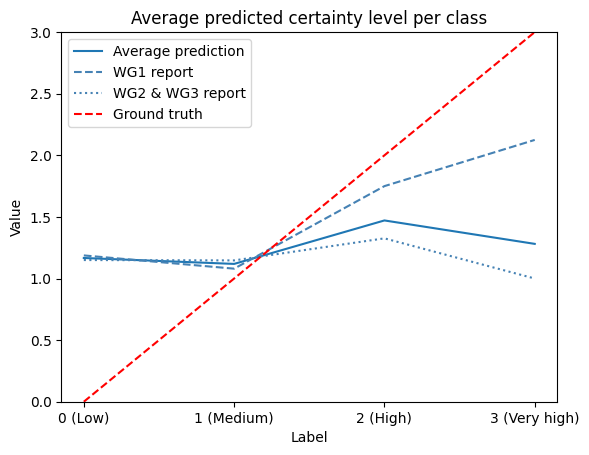

In [23]:
# Define the data

# Extract labels and values from the data dictionary
labels = list(scores_all.keys())
values_all = list(scores_all.values())
values_wg1 = list(scores_wg1.values())
values_wg23 = list(scores_wg23.values())

# Define the custom labels for the x-axis
x_labels = ['0 (Low)', '1 (Medium)', '2 (High)', '3 (Very high)']

# Create the line plot with labeled curve
sns.lineplot(x=labels, y=values_all, label='Average prediction')
sns.lineplot(x=labels, y=values_wg1, linestyle='--', color="steelblue", label='WG1 report')
sns.lineplot(x=labels, y=values_wg23, linestyle='dotted', color="steelblue", label='WG2 & WG3 report')


# Add the ground truth line (y = x)
x = np.arange(len(labels))
plt.plot(x, x, linestyle='--', color='red', label='Ground truth')

# Customize the x-axis tick labels
plt.xticks(labels, x_labels)

# Set the y-axis limits
plt.ylim(0, 3)

# Set the title and labels
plt.title("Average predicted certainty level per class")
plt.xlabel("Label")
plt.ylabel("Value")

# Show the legend
plt.legend()

# Show the plot
plt.show()

In [24]:
samples.to_csv('gpt3.5-turbo-demos-temp0-2024-05-15.csv', index=False)

## Level 2 (few-shot GPT-4)

In [33]:
lm = GPT3(model = "gpt-4", api_key=new_api_key, model_type="chat")

settings.configure(lm=lm)
settings.show_guidelines = True

In [34]:
## few-shot

Input = dsp.Type(
    prefix="Statement:", 
    desc="${a short statement about climate.}")

Table = dsp.Type(
    prefix="IAMs output: ", 
    desc="${a json table from IAM climate modeling.}")

Label = dsp.Type(
    prefix="Confidence: ", 
    desc="${must be *only*: 'low', 'medium', 'high', 'very high'}")

few_shot_template = dsp.Template(
    instructions="You are a knowledgeable climate science assistant trained to assess the confidence level associated with various statements about climate change. \
      \n\nYou will be presented with a statement about climate science, climate impacts or climate change mitigation which is retrieved or paraphrased from the IPCC AR6 WGI, WGII or WGIII assessment reports. Climate scientists have evaluated that statement as low confidence, medium confidence, high confidence, or very high confidence, based on evidence (type, amount, quantity, consistency) and agreement among their peers. What is their confidence level?  \
      \n\nRespond *only* with one of the following words: 'low', 'medium', 'high', 'very high'. If you don't know, you can respond 'I don't know'.",
    input=Input(),
    table = Table(),
    label=Label())

In [27]:
pred = []
for i in samples.statement_idx:
    print(i)
    ex = Example(input=samples.statement[i], table = samples.tables[i])
    ex.demos=sample(ipcc_train, 3)
    pred.append(extract_confidence(assess_certainty_with_demonstrations(ex).label.lower()))

samples['prediction'] = pred

3
42
77
81
86
98
151
157
162
165
190
197
233
237
282
322
361
371
415
419
467
497
548
556
572
583
586
593
602
621
663
671
679
687
688
736
741
768
772
774
783
795
855
922
941
974
980
997
1005
1027
1036
1042
1096
1185
1259
1263
1275
1304
1332
1342
1362
1390
1450
1466
1470
1489
1507
1510
1567
1591
1630
1664
1666
1760
1804
1831
1838
1885
1906
1928
1935
1956
1957
2001
2016
2046
2089
2095
2115
2132
2191
2196
2208
2235
2293
2310
2392
2423
2430
2473
2518
2520
2525
2572
2589
2599
2605
2616
2672
2685
2804
2914
2930
2964
3015
3071
3127
3156
3184
3186
3222
3242
3246
3250
3282
3290
3305
3333
3381
3418
3419
3426
3428
3455
3456
3487
3553
3574
3581
3609
3659
3693
3747
3757
3759
3788
3800
3832
3851
3865
3872
3887
3908
3942
3950
3976
4048
4052
4080
4145
4190
4239
4253
4254
4264
4345
4420
4439
4446
4456
4541
4580
4611
4636
4696
4764
4824
4882
4948
4956
4965
4970
5038
5048
5092
5093
5099
5120
5137
5166
5171
5202
5243
5246
5285
5324
5335
5349
5351
5354
5390
5436
5444
5498
5620
5670
5704
5737
5798
5825
5922


In [28]:
samples['correct'] = samples.apply(
    lambda row: (row['confidence'] == row['prediction']), axis=1)

print(f"Accuracy: {samples['correct'].sum() / (samples.shape[0]-len(samples[samples['prediction'] == 'idk'])):.3f}")
print(f"'I don't know': {len(samples[samples['prediction'] == 'idk'])}")
print(f"N/A: {len(samples[samples['prediction'] == 'N/A'])}")

Accuracy: 0.433
'I don't know': 25
N/A: 0


In [29]:


true_labels = samples.loc[(samples['prediction'] != 'N/A') & (samples['prediction'] != 'idk'), 'confidence']
predicted_labels = samples.loc[(samples['prediction'] != 'N/A') & (samples['prediction'] != 'idk'), 'prediction']

# Compute macro F1 score
f1 = f1_score(true_labels, predicted_labels, average='macro')
print("Macro F1 score:", f1)

# Compute weighted F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')
print("Weighted F1 score:", f1)

# Compute precision for each class
precision = precision_score(true_labels, predicted_labels, average=None)

# Compute recall for each class
recall = recall_score(true_labels, predicted_labels, average=None)

# Compute F1 score for each class
f1 = f1_score(true_labels, predicted_labels, average=None)

# Create a dataframe to store precision and recall for each class
class_metrics_df = pd.DataFrame({'Precision': precision, 'Recall': recall, 'F1': f1})

# Add labels to the class metrics dataframe
class_metrics_df['Class'] = true_labels.unique().astype(str)

# Sort the dataframe by class index or name
class_metrics_df = class_metrics_df.sort_values('Class', key=lambda x: pd.Categorical(x, categories=["low", "medium", "high", "very high"]))

# Print class metrics dataframe
#print(class_metrics_df)

# Compute accuracy for the whole system
accuracy = accuracy_score(true_labels, predicted_labels)

# Compute accuracy by class

print("Accuracy (total):", accuracy)

report = classification_report(true_labels, predicted_labels, digits=4)
print(report)

# Count classes
category_counts = true_labels.value_counts()
print(category_counts)

Macro F1 score: 0.33767257596557687
Weighted F1 score: 0.394335403004483
Accuracy (total): 0.43272727272727274
              precision    recall  f1-score   support

        high     0.4370    0.6277    0.5153        94
         low     1.0000    0.1042    0.1887        48
      medium     0.4348    0.5495    0.4854        91
   very high     0.2500    0.1190    0.1613        42

    accuracy                         0.4327       275
   macro avg     0.5305    0.3501    0.3377       275
weighted avg     0.5060    0.4327    0.3943       275

confidence
high         94
medium       91
low          48
very high    42
Name: count, dtype: int64


In [30]:
# Filter samples
fs = samples.loc[(samples['prediction'] != 'N/A') & (samples['prediction'] != 'idk')] 

# Compute a certainty score
value_map = {'low': 0, 'medium': 1, 'high': 2, 'very high': 3}

fs['predicted_score'] = fs.prediction.apply(
    lambda x: value_map[x])

# Break down scores
scores_all = {
    "low": fs.loc[fs['score'] == 0, 'predicted_score'].mean(),
    "medium": fs.loc[fs['score'] == 1, 'predicted_score'].mean(),
    "high": fs.loc[fs['score'] == 2, 'predicted_score'].mean(),
    "very high": fs.loc[fs['score'] == 3, 'predicted_score'].mean()
}

scores_wg1 = {
    "low": fs.loc[(fs['score'] == 0) & (fs['report'] == 'AR6_WGI'), 'predicted_score'].mean(),
    "medium": fs.loc[(fs['score'] == 1) & (fs['report'] == 'AR6_WGI'), 'predicted_score'].mean(),
    "high": fs.loc[(fs['score'] == 2) & (fs['report'] == 'AR6_WGI'), 'predicted_score'].mean(),
    "very high": fs.loc[(fs['score'] == 3) & (fs['report'] == 'AR6_WGI'), 'predicted_score'].mean()
}

scores_wg23 = {
    "low": fs.loc[(fs['score'] == 0) & (fs['report'] != 'AR6_WGI'), 'predicted_score'].mean(),
    "medium": fs.loc[(fs['score'] == 1) & (fs['report'] != 'AR6_WGI'), 'predicted_score'].mean(),
    "high": fs.loc[(fs['score'] == 2) & (fs['report'] != 'AR6_WGI'), 'predicted_score'].mean(),
    "very high": fs.loc[(fs['score'] == 3) & (fs['report'] != 'AR6_WGI'), 'predicted_score'].mean()
}

print("=== All AR6 reports===")
print(f"Average ground truth score: {samples['score'].mean()}")
print(f"Average predicted score: {fs['predicted_score'].mean()}")
print(f"Average scores per category: {scores_all}\n")

print("=== AR6 WGI report ===")
print(f"Average ground truth score: {samples.loc[samples['report'] == 'AR6_WGI', 'score'].mean()}")
print(f"Average predicted score: {fs.loc[fs['report'] == 'AR6_WGI', 'predicted_score'].mean()}")
print(f"Average scores per category: {scores_wg1}\n")

print("=== AR6 WGII/III reports ===")
print(f"Average ground truth score: {samples.loc[samples['report'] != 'AR6_WGI', 'score'].mean()}")
print(f"Average predicted score: {fs.loc[fs['report'] != 'AR6_WGI', 'predicted_score'].mean()}")
print(f"Average scores per category: {scores_wg23}\n")

=== All AR6 reports===
Average ground truth score: 1.5
Average predicted score: 1.6181818181818182
Average scores per category: {'low': 1.0625, 'medium': 1.4835164835164836, 'high': 1.8829787234042554, 'very high': 1.9523809523809523}

=== AR6 WGI report ===
Average ground truth score: 1.3157894736842106
Average predicted score: 1.7692307692307692
Average scores per category: {'low': 1.1578947368421053, 'medium': 1.625, 'high': 2.1333333333333333, 'very high': 2.3}

=== AR6 WGII/III reports ===
Average ground truth score: 1.5853658536585367
Average predicted score: 1.5434782608695652
Average scores per category: {'low': 1.0, 'medium': 1.4067796610169492, 'high': 1.765625, 'very high': 1.84375}



/var/folders/8f/3g1vyjkx4vx5trj78yg69khm0000gn/T/ipykernel_45011/201967900.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fs['predicted_score'] = fs.prediction.apply(


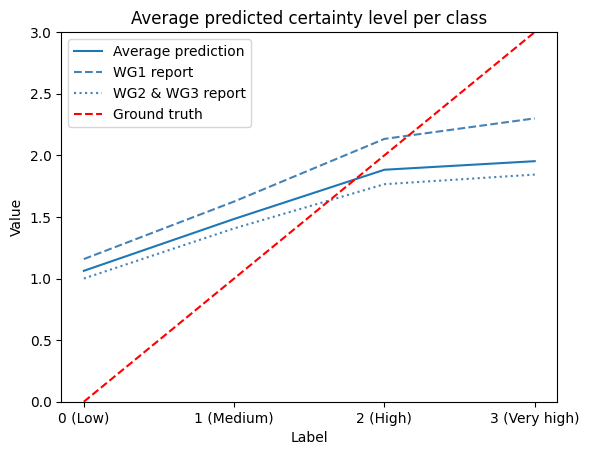

In [31]:
# Define the data

# Extract labels and values from the data dictionary
labels = list(scores_all.keys())
values_all = list(scores_all.values())
values_wg1 = list(scores_wg1.values())
values_wg23 = list(scores_wg23.values())

# Define the custom labels for the x-axis
x_labels = ['0 (Low)', '1 (Medium)', '2 (High)', '3 (Very high)']

# Create the line plot with labeled curve
sns.lineplot(x=labels, y=values_all, label='Average prediction')
sns.lineplot(x=labels, y=values_wg1, linestyle='--', color="steelblue", label='WG1 report')
sns.lineplot(x=labels, y=values_wg23, linestyle='dotted', color="steelblue", label='WG2 & WG3 report')


# Add the ground truth line (y = x)
x = np.arange(len(labels))
plt.plot(x, x, linestyle='--', color='red', label='Ground truth')

# Customize the x-axis tick labels
plt.xticks(labels, x_labels)

# Set the y-axis limits
plt.ylim(0, 3)

# Set the title and labels
plt.title("Average predicted certainty level per class")
plt.xlabel("Label")
plt.ylabel("Value")

# Show the legend
plt.legend()

# Show the plot
plt.show()

In [32]:
samples.to_csv('gpt4-demos-temp0-2024-05-15.csv', index=False)

## Level2 (few-shot GPT-4-Turbo)

In [35]:
lm = GPT3(model = "gpt-4-turbo", api_key=new_api_key, model_type="chat")

settings.configure(lm=lm)
settings.show_guidelines = True

In [36]:
## few-shot

Input = dsp.Type(
    prefix="Statement:", 
    desc="${a short statement about climate.}")

Table = dsp.Type(
    prefix="IAMs output: ", 
    desc="${a json table from IAM climate modeling.}")

Label = dsp.Type(
    prefix="Confidence: ", 
    desc="${must be *only*: 'low', 'medium', 'high', 'very high'}")

few_shot_template = dsp.Template(
    instructions="You are a knowledgeable climate science assistant trained to assess the confidence level associated with various statements about climate change. \
      \n\nYou will be presented with a statement about climate science, climate impacts or climate change mitigation which is retrieved or paraphrased from the IPCC AR6 WGI, WGII or WGIII assessment reports. Climate scientists have evaluated that statement as low confidence, medium confidence, high confidence, or very high confidence, based on evidence (type, amount, quantity, consistency) and agreement among their peers. What is their confidence level?  \
      \n\nRespond *only* with one of the following words: 'low', 'medium', 'high', 'very high'. If you don't know, you can respond 'I don't know'.",
    input=Input(),
    table = Table(),
    label=Label())

In [37]:
pred = []
for i in samples.statement_idx:
    print(i)
    ex = Example(input=samples.statement[i], table = samples.tables[i])
    ex.demos=sample(ipcc_train, 3)
    pred.append(extract_confidence(assess_certainty_with_demonstrations(ex).label.lower()))

samples['prediction'] = pred

3
42
77
81
86
98
151
157
162
165
190
197
233
237
282
322
361
371
415
419
467
497
548
556
572
583
586
593
602
621
663
671
679
687
688
736
741
768
772
774
783
795
855
922
941
974
980
997
1005
1027
1036
1042
1096
1185
1259
1263
1275
1304
1332
1342
1362
1390
1450
1466
1470
1489
1507
1510
1567
1591
1630
1664
1666
1760
1804
1831
1838
1885
1906
1928
1935
1956
1957
2001
2016
2046
2089
2095
2115
2132
2191
2196
2208
2235
2293
2310
2392
2423
2430
2473
2518
2520
2525
2572
2589
2599
2605
2616
2672
2685
2804
2914
2930
2964
3015
3071
3127
3156
3184
3186
3222
3242
3246
3250
3282
3290
3305
3333
3381
3418
3419
3426
3428
3455
3456
3487
3553
3574
3581
3609
3659
3693
3747
3757
3759
3788
3800
3832
3851
3865
3872
3887
3908
3942
3950
3976
4048
4052
4080
4145
4190
4239
4253
4254
4264
4345
4420
4439
4446
4456
4541
4580
4611
4636
4696
4764
4824
4882
4948
4956
4965
4970
5038
5048
5092
5093
5099
5120
5137
5166
5171
5202
5243
5246
5285
5324
5335
5349
5351
5354
5390
5436
5444
5498
5620
5670
5704
5737
5798
5825
5922


In [38]:
samples['correct'] = samples.apply(
    lambda row: (row['confidence'] == row['prediction']), axis=1)

print(f"Accuracy: {samples['correct'].sum() / (samples.shape[0]-len(samples[samples['prediction'] == 'idk'])):.3f}")
print(f"'I don't know': {len(samples[samples['prediction'] == 'idk'])}")
print(f"N/A: {len(samples[samples['prediction'] == 'N/A'])}")

Accuracy: 0.477
'I don't know': 0
N/A: 0


In [39]:


true_labels = samples.loc[(samples['prediction'] != 'N/A') & (samples['prediction'] != 'idk'), 'confidence']
predicted_labels = samples.loc[(samples['prediction'] != 'N/A') & (samples['prediction'] != 'idk'), 'prediction']

# Compute macro F1 score
f1 = f1_score(true_labels, predicted_labels, average='macro')
print("Macro F1 score:", f1)

# Compute weighted F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')
print("Weighted F1 score:", f1)

# Compute precision for each class
precision = precision_score(true_labels, predicted_labels, average=None)

# Compute recall for each class
recall = recall_score(true_labels, predicted_labels, average=None)

# Compute F1 score for each class
f1 = f1_score(true_labels, predicted_labels, average=None)

# Create a dataframe to store precision and recall for each class
class_metrics_df = pd.DataFrame({'Precision': precision, 'Recall': recall, 'F1': f1})

# Add labels to the class metrics dataframe
class_metrics_df['Class'] = true_labels.unique().astype(str)

# Sort the dataframe by class index or name
class_metrics_df = class_metrics_df.sort_values('Class', key=lambda x: pd.Categorical(x, categories=["low", "medium", "high", "very high"]))

# Print class metrics dataframe
#print(class_metrics_df)

# Compute accuracy for the whole system
accuracy = accuracy_score(true_labels, predicted_labels)

# Compute accuracy by class

print("Accuracy (total):", accuracy)

report = classification_report(true_labels, predicted_labels, digits=4)
print(report)

# Count classes
category_counts = true_labels.value_counts()
print(category_counts)

Macro F1 score: 0.4122779742947419
Weighted F1 score: 0.449119170404685
Accuracy (total): 0.4766666666666667
              precision    recall  f1-score   support

        high     0.5246    0.6400    0.5766       100
         low     0.4889    0.4400    0.4632        50
      medium     0.4206    0.5300    0.4690       100
   very high     0.5714    0.0800    0.1404        50

    accuracy                         0.4767       300
   macro avg     0.5014    0.4225    0.4123       300
weighted avg     0.4918    0.4767    0.4491       300

confidence
high         100
medium       100
very high     50
low           50
Name: count, dtype: int64


In [40]:
# Filter samples
fs = samples.loc[(samples['prediction'] != 'N/A') & (samples['prediction'] != 'idk')] 

# Compute a certainty score
value_map = {'low': 0, 'medium': 1, 'high': 2, 'very high': 3}

fs['predicted_score'] = fs.prediction.apply(
    lambda x: value_map[x])

# Break down scores
scores_all = {
    "low": fs.loc[fs['score'] == 0, 'predicted_score'].mean(),
    "medium": fs.loc[fs['score'] == 1, 'predicted_score'].mean(),
    "high": fs.loc[fs['score'] == 2, 'predicted_score'].mean(),
    "very high": fs.loc[fs['score'] == 3, 'predicted_score'].mean()
}

scores_wg1 = {
    "low": fs.loc[(fs['score'] == 0) & (fs['report'] == 'AR6_WGI'), 'predicted_score'].mean(),
    "medium": fs.loc[(fs['score'] == 1) & (fs['report'] == 'AR6_WGI'), 'predicted_score'].mean(),
    "high": fs.loc[(fs['score'] == 2) & (fs['report'] == 'AR6_WGI'), 'predicted_score'].mean(),
    "very high": fs.loc[(fs['score'] == 3) & (fs['report'] == 'AR6_WGI'), 'predicted_score'].mean()
}

scores_wg23 = {
    "low": fs.loc[(fs['score'] == 0) & (fs['report'] != 'AR6_WGI'), 'predicted_score'].mean(),
    "medium": fs.loc[(fs['score'] == 1) & (fs['report'] != 'AR6_WGI'), 'predicted_score'].mean(),
    "high": fs.loc[(fs['score'] == 2) & (fs['report'] != 'AR6_WGI'), 'predicted_score'].mean(),
    "very high": fs.loc[(fs['score'] == 3) & (fs['report'] != 'AR6_WGI'), 'predicted_score'].mean()
}

print("=== All AR6 reports===")
print(f"Average ground truth score: {samples['score'].mean()}")
print(f"Average predicted score: {fs['predicted_score'].mean()}")
print(f"Average scores per category: {scores_all}\n")

print("=== AR6 WGI report ===")
print(f"Average ground truth score: {samples.loc[samples['report'] == 'AR6_WGI', 'score'].mean()}")
print(f"Average predicted score: {fs.loc[fs['report'] == 'AR6_WGI', 'predicted_score'].mean()}")
print(f"Average scores per category: {scores_wg1}\n")

print("=== AR6 WGII/III reports ===")
print(f"Average ground truth score: {samples.loc[samples['report'] != 'AR6_WGI', 'score'].mean()}")
print(f"Average predicted score: {fs.loc[fs['report'] != 'AR6_WGI', 'predicted_score'].mean()}")
print(f"Average scores per category: {scores_wg23}\n")

=== All AR6 reports===
Average ground truth score: 1.5
Average predicted score: 1.3033333333333332
Average scores per category: {'low': 0.7, 'medium': 1.14, 'high': 1.61, 'very high': 1.62}

=== AR6 WGI report ===
Average ground truth score: 1.3157894736842106
Average predicted score: 1.4105263157894736
Average scores per category: {'low': 0.65, 'medium': 1.2571428571428571, 'high': 1.8666666666666667, 'very high': 2.1}

=== AR6 WGII/III reports ===
Average ground truth score: 1.5853658536585367
Average predicted score: 1.2536585365853659
Average scores per category: {'low': 0.7333333333333333, 'medium': 1.0769230769230769, 'high': 1.5, 'very high': 1.5}



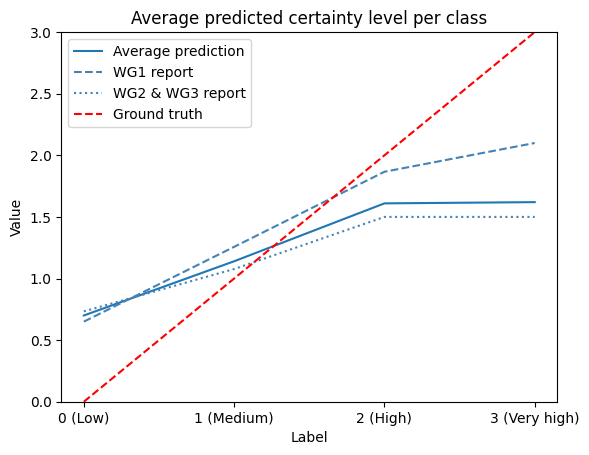

In [41]:
# Define the data

# Extract labels and values from the data dictionary
labels = list(scores_all.keys())
values_all = list(scores_all.values())
values_wg1 = list(scores_wg1.values())
values_wg23 = list(scores_wg23.values())

# Define the custom labels for the x-axis
x_labels = ['0 (Low)', '1 (Medium)', '2 (High)', '3 (Very high)']

# Create the line plot with labeled curve
sns.lineplot(x=labels, y=values_all, label='Average prediction')
sns.lineplot(x=labels, y=values_wg1, linestyle='--', color="steelblue", label='WG1 report')
sns.lineplot(x=labels, y=values_wg23, linestyle='dotted', color="steelblue", label='WG2 & WG3 report')


# Add the ground truth line (y = x)
x = np.arange(len(labels))
plt.plot(x, x, linestyle='--', color='red', label='Ground truth')

# Customize the x-axis tick labels
plt.xticks(labels, x_labels)

# Set the y-axis limits
plt.ylim(0, 3)

# Set the title and labels
plt.title("Average predicted certainty level per class")
plt.xlabel("Label")
plt.ylabel("Value")

# Show the legend
plt.legend()

# Show the plot
plt.show()

In [42]:
samples.to_csv('gpt4-turbo-demos-temp0-2024-05-15.csv', index=False)

## CMIP 

In [3]:
# !conda install -c conda-forge xcdat=0.7.0 xesmf matplotlib ipython ipykernel cartopy nc-time-axis gsw-xarray jupyter

### Xarray

In [1]:
import xarray as xr

filepath = "https://esgf-data1.llnl.gov/thredds/dodsC/css03_data/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/r10i1p1f1/Amon/tas/gn/v20200605/tas_Amon_ACCESS-ESM1-5_historical_r10i1p1f1_gn_185001-201412.nc"

ds = xr.open_dataset(filepath)

In [2]:
ds

<xarray.Dataset> Size: 221MB
Dimensions:    (time: 1980, bnds: 2, lat: 145, lon: 192)
Coordinates:
  * time       (time) datetime64[ns] 16kB 1850-01-16T12:00:00 ... 2014-12-16T...
  * lat        (lat) float64 1kB -90.0 -88.75 -87.5 -86.25 ... 87.5 88.75 90.0
  * lon        (lon) float64 2kB 0.0 1.875 3.75 5.625 ... 354.4 356.2 358.1
    height     float64 8B ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 32kB ...
    lat_bnds   (lat, bnds) float64 2kB ...
    lon_bnds   (lon, bnds) float64 3kB ...
    tas        (time, lat, lon) float32 220MB ...
Attributes: (12/48)
    Conventions:                     CF-1.7 CMIP-6.2
    activity_id:                     CMIP
    branch_method:                   standard
    branch_time_in_child:            0.0
    branch_time_in_parent:           87658.0
    creation_date:                   2020-06-05T04:06:11Z
    ...                              ...
    variant_label:                   r10i1p1f1
    version:                         v20200605
    license:                         CMIP6 model data produced by CSIRO is li...
    cmor_version:                    3.4.0
    tracking_id:                     hdl:21.14100/af78ae5e-f3a6-4e99-8cfe-5f2...
    DODS_EXTRA.Unlimited_Dimension:  time

In [3]:
ds.tas

<xarray.DataArray 'tas' (time: 1980, lat: 145, lon: 192)> Size: 220MB
[55123200 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 16kB 1850-01-16T12:00:00 ... 2014-12-16T12...
  * lat      (lat) float64 1kB -90.0 -88.75 -87.5 -86.25 ... 87.5 88.75 90.0
  * lon      (lon) float64 2kB 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
    height   float64 8B ...
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        near-surface (usually, 2 meter) air temperature
    units:          K
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2020-06-05T04:06:10Z altered by CMOR: Treated scalar dime...
    _ChunkSizes:    [  1 145 192]

### xCDAT

- Scenario 1 - Calculate the spatial averages over the tropical region
- Scenario 2 - Calculate the annual anomalies
- Scenario 3 - Horizontal regridding (bilinear, gaussian grid)

In [6]:
# !conda install -c conda-forge xcdat xesmf

In [1]:
import os
os.environ['ESMFMKFILE'] = '/Users/ylpan/anaconda3/envs/xcdat_notebook/lib/esmf.mk'
import xcdat

In [4]:
# This gives access to all xcdat public top-level APIs and accessor classes.
import xcdat as xc

# We import these packages specifically for plotting. It is not required to use xcdat.
import matplotlib.pyplot as plt
import pandas as pd

filepath = "https://esgf-data1.llnl.gov/thredds/dodsC/css03_data/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/r10i1p1f1/Amon/tas/gn/v20200605/tas_Amon_ACCESS-ESM1-5_historical_r10i1p1f1_gn_185001-201412.nc"

ds = xc.open_dataset(filepath)

# Unit adjustment from Kelvin to Celcius.
ds["tas"] = ds.tas - 273.15

In [5]:
ds

<xarray.Dataset> Size: 221MB
Dimensions:    (time: 1980, bnds: 2, lat: 145, lon: 192)
Coordinates:
  * lat        (lat) float64 1kB -90.0 -88.75 -87.5 -86.25 ... 87.5 88.75 90.0
  * lon        (lon) float64 2kB 0.0 1.875 3.75 5.625 ... 354.4 356.2 358.1
    height     float64 8B 2.0
  * time       (time) object 16kB 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 32kB ...
    lat_bnds   (lat, bnds) float64 2kB ...
    lon_bnds   (lon, bnds) float64 3kB ...
    tas        (time, lat, lon) float32 220MB -27.19 -27.19 ... -25.29 -25.29
Attributes: (12/48)
    Conventions:                     CF-1.7 CMIP-6.2
    activity_id:                     CMIP
    branch_method:                   standard
    branch_time_in_child:            0.0
    branch_time_in_parent:           87658.0
    creation_date:                   2020-06-05T04:06:11Z
    ...                              ...
    variant_label:                   r10i1p1f1
    version:                         v20200605
    license:                         CMIP6 model data produced by CSIRO is li...
    cmor_version:                    3.4.0
    tracking_id:                     hdl:21.14100/af78ae5e-f3a6-4e99-8cfe-5f2...
    DODS_EXTRA.Unlimited_Dimension:  time

#### Scenario 1

In [6]:
ds_trop_avg = ds.spatial.average("tas", axis=["X", "Y"], lat_bounds=(-25, 25))
ds_trop_avg.tas

<xarray.DataArray 'tas' (time: 1980)> Size: 16kB
array([25.24722608, 25.61795924, 25.96516235, ..., 26.79536823,
       26.67771602, 26.27182383])
Coordinates:
    height   float64 8B 2.0
  * time     (time) object 16kB 1850-01-16 12:00:00 ... 2014-12-16 12:00:00

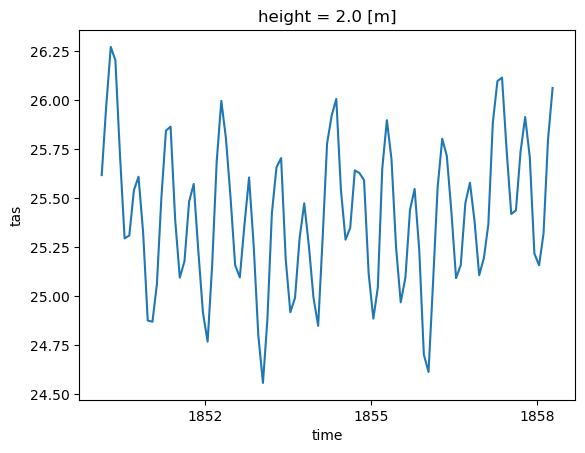

In [7]:
ds_trop_avg.tas.isel(time=slice(1, 100)).plot()

#### Scenario 2

In [8]:
ds_avg = ds.temporal.average("tas", weighted=True)
ds_avg.tas

<xarray.DataArray 'tas' (lat: 145, lon: 192)> Size: 223kB
array([[-48.01481628, -48.01481628, -48.01481628, ..., -48.01481628,
        -48.01481628, -48.01481628],
       [-44.94085363, -44.97948214, -45.01815398, ..., -44.82408252,
        -44.86273067, -44.9009281 ],
       [-44.11875274, -44.23060624, -44.33960158, ..., -43.76766492,
        -43.88593717, -44.00303006],
       ...,
       [-18.21076615, -18.17513373, -18.13957458, ..., -18.32720478,
        -18.28428828, -18.2486193 ],
       [-18.50778243, -18.49301854, -18.47902819, ..., -18.55410851,
        -18.5406963 , -18.52413098],
       [-19.07366375, -19.07366375, -19.07366375, ..., -19.07366375,
        -19.07366375, -19.07366375]])
Coordinates:
  * lat      (lat) float64 1kB -90.0 -88.75 -87.5 -86.25 ... 87.5 88.75 90.0
  * lon      (lon) float64 2kB 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
    height   float64 8B 2.0
Attributes:
    operation:  temporal_avg
    mode:       average
    freq:       month
    weighted:   True

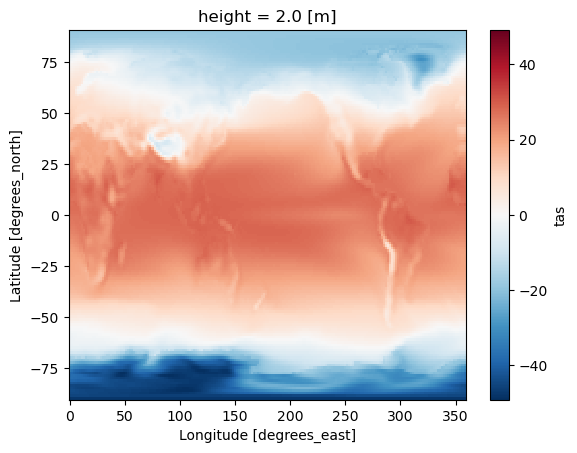

In [9]:
ds_avg.tas.plot(label="weighted")

#### Scenario 3

In [10]:
output_grid = xc.create_gaussian_grid(32)
output_grid

<xarray.Dataset> Size: 2kB
Dimensions:   (lon: 65, bnds: 2, lat: 32)
Coordinates:
  * lon       (lon) float64 520B 0.0 5.625 11.25 16.88 ... 348.8 354.4 360.0
  * lat       (lat) float64 256B 85.76 80.27 74.74 ... -74.74 -80.27 -85.76
Dimensions without coordinates: bnds
Data variables:
    lon_bnds  (lon, bnds) float64 1kB -2.812 2.812 2.812 ... 357.2 357.2 362.8
    lat_bnds  (lat, bnds) float64 512B 90.0 83.21 83.21 ... -83.21 -83.21 -90.0

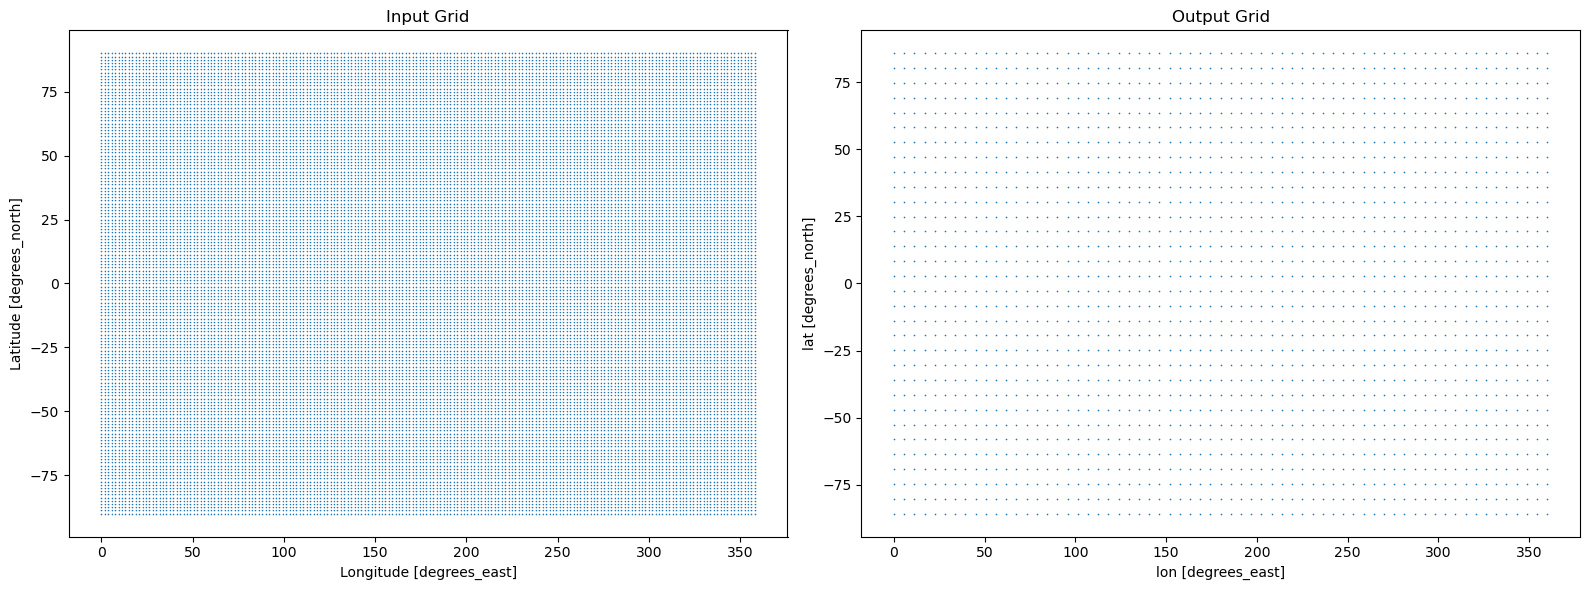

In [11]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 6))

input_grid = ds.regridder.grid
input_grid.plot.scatter(
    x="lon", y="lat", s=5, ax=axes[0], add_colorbar=False, cmap=plt.cm.RdBu
)
axes[0].set_title("Input Grid")

output_grid.plot.scatter(
    x="lon", y="lat", s=5, ax=axes[1], add_colorbar=False, cmap=plt.cm.RdBu
)
axes[1].set_title("Output Grid")

plt.tight_layout()

In [12]:
# xesmf supports "bilinear", "conservative", "nearest_s2d", "nearest_d2s", and "patch"
output = ds.regridder.horizontal("tas", output_grid, tool="xesmf", method="bilinear")

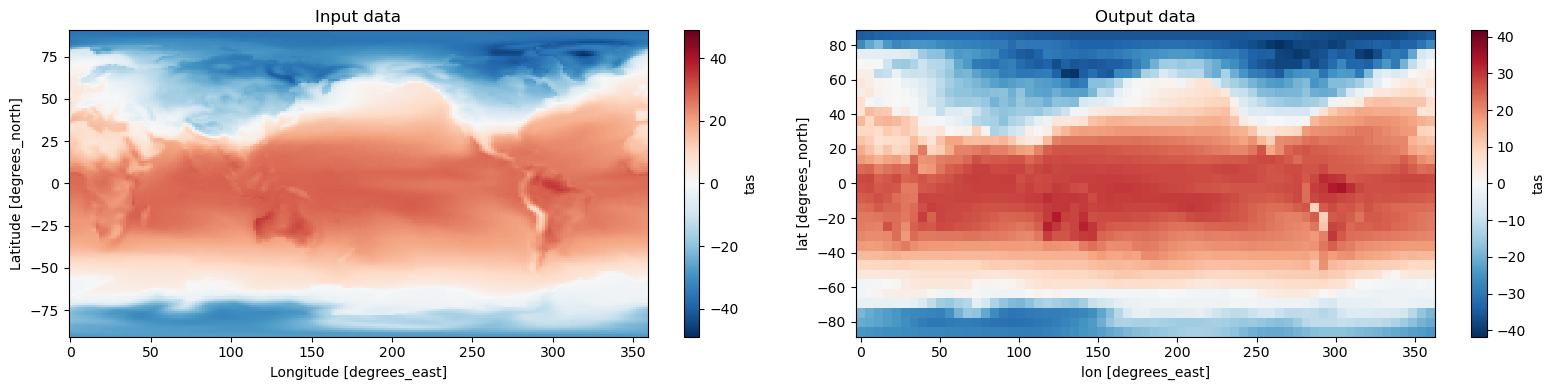

In [13]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 4))

ds.tas.isel(time=0).plot(ax=axes[0])
axes[0].set_title("Input data")

output.tas.isel(time=0).plot(ax=axes[1])
axes[1].set_title("Output data")

plt.tight_layout()